# 线性代数基础
线性代数是数学中处理具有多维结构的数字序列的一个分支。这些多维结构被称为标量、向量、矩阵和张量。人工智能需要处理非常多的数值，而使用线性代数可以利用简单的公式来表达对多个数值的处理。而且，可以利用numpy轻松地将公式应用于代码中。

虽然真正学习线性代数需要花费大量的精力和时间，但本章内容仅限于初学人工智能所需的范围。

学会灵活运用线性代数，可以高校地处理大量的数值数据。


本章是数学教科书的第四章节，主要学习线性代数的相关基础知识，主要涉及的内容有
- 标量、向量、矩阵、张量
- 向量点积
  - 向量叉积 cross product
- 向量范数
- 矩阵的积
  - 哈达玛积
- 矩阵转置
- 行列式与逆矩阵
- 线性变化
- 特征值和特征向量
- 余弦相似度


## 1）标量、向量、矩阵和张量

编程语言中往往有基础数据类型和组合数据类型，基础数据类型如字符、整形、浮点数，是原子个体的类型；但孤立的数据在处理时缺乏效率并且缺乏相应的表示能力；组合数据类型如数组、字符串、对象等则将基础数据类型根据规则进行了组织，增加了数据表达能力，便利了程序处理提高了效率。人工智能的训练同样需要对大量的数据进行处理，因此需要在数据层面对数据进行编码，表示，计算等，而标量、向量、矩阵和张量正是这个过程中所需的重要工具，他们在不同的数据维度上发挥作用。

### a-标量 scaler

标量（scaler）就是像1、5、1.2、-7 等正常的数字。一般用小写英语或希腊字母表示

标量的示例：$a、p、\alpha、\gamma $

python中处理的正常数值就与标量对应  


In [2]:
# python 中的标量
a = 1
b = 1.2
c = -0.25
d = 1.2e5

[a,b,c,d]

[1, 1.2, -0.25, 120000.0]

### b-向量 vector

标量只表示数值大小，而向量通过标量的组合不仅表示大小而且表示方向，标量的个数反映了向量的维度。

向量的写法是将标量排列在直线上，通常用一个小写字母加上箭头表示

向量包括垂直排列数值的垂直向量，以及水平排列数值的水平向量。本书主要使用水平向量，因此单纯写作向量时所指的是水平向量

在python中可以使用 Numpy 的一维数组来表示向量

In [3]:
import numpy as np

a = np.array([1,2,3])
print(a)

b = np.array([-2.4, 0.25, -1.3, 1.8, 0.61])
print(b)

[1 2 3]
[-2.4   0.25 -1.3   1.8   0.61]


### c-矩阵 matrix

矩阵是将标量排列成格子状的产物，在矩阵中，标量的水平排列被称为行，标量的垂直排列被称为列。m行n列矩阵表示为 $m\times n$ 矩阵

因此，下图的矩阵就是 $3\times3$ 矩阵。

矩阵一般用大写的斜体字母表示

$$
 \begin{bmatrix}
   1 & 2 & 3 \\
   4 & 5 & 6 \\
   7 & 8 & 9
  \end{bmatrix}
  \tag{2}
$$

Numpy的二维数组可以表示矩阵

In [4]:

a = np.array([[1,2,3],
              [4,5,6]])

print(a)

b = np.array([[0.21, 0.14],
              [-1.3, 0.81],
              [0.12, -2.1]])

print(b)

[[1 2 3]
 [4 5 6]]
[[ 0.21  0.14]
 [-1.3   0.81]
 [ 0.12 -2.1 ]]


### d-张量 tensor

张量是在多个维度中排列的标量，其中包括标量、向量和矩阵。

每个元素的下标数被称为张量的**阶数**。标量没有下标，因此它是0阶向量，向量有1个下标，因此为1阶张量，矩阵有2个下标，因此为2阶张量。

更高维度的还有3阶张量、4阶张量

> 这里对于张量的定义采取了简化的定义，在数学和物理中，张量的定义实际上要更为复杂

可以使用Numpy的多维数组来表示3阶张量

In [5]:

a = np.array([[
                [0,1,2,3],
                [2,3,4,5],
                [4,5,6,7]
              ],
              [
                [1,2,3,4],
                [3,4,5,6],
                [5,6,7,8]
              ]])

print(a)


[[[0 1 2 3]
  [2 3 4 5]
  [4 5 6 7]]

 [[1 2 3 4]
  [3 4 5 6]
  [5 6 7 8]]]


## 2）向量的点积和范数

主要掌握点积和范数的意义及计算方法，同时熟悉向量操作

### a-点积

假设有两个向量 $\mathbf{A}$ 和 $\mathbf{B}$，它们在 $n$ 维空间中表示为：

$$ 
\mathbf{A} = [A_1, A_2, \ldots, A_n] 
$$

$$ 
\mathbf{B} = [B_1, B_2, \ldots, B_n] 
$$

则它们的点积 $\mathbf{A} \cdot \mathbf{B}$ 定义为：

$$ 
\mathbf{A} \cdot \mathbf{B} = A_1 B_1 + A_2 B_2 + \cdots + A_n B_n 
$$

换句话说，点积是两个向量对应元素的乘积之和。

#### 点积的性质

1. **交换律**：

$$ 
\mathbf{A} \cdot \mathbf{B} = \mathbf{B} \cdot \mathbf{A} 
$$

2. **分配律**：

$$ 
\mathbf{A} \cdot (\mathbf{B} + \mathbf{C}) = \mathbf{A} \cdot \mathbf{B} + \mathbf{A} \cdot \mathbf{C} 
$$

3. **与标量乘积结合**：

$$ 
(c\mathbf{A}) \cdot \mathbf{B} = c(\mathbf{A} \cdot \mathbf{B}) = \mathbf{A} \cdot (c\mathbf{B}) 
$$

其中 $c$ 是一个标量。

#### 几何解释

两个向量 $\mathbf{A}$ 和 $\mathbf{B}$ 的点积还可以通过它们的模长和夹角来表示：

$$ 
\mathbf{A} \cdot \mathbf{B} = |\mathbf{A}| |\mathbf{B}| \cos \theta 
$$

其中 $|\mathbf{A}|$ 和 $|\mathbf{B}|$ 分别是向量 $\mathbf{A}$ 和 $\mathbf{B}$ 的模长，$\theta$ 是它们之间的夹角。

这种几何解释表明，点积可以用来判断两个向量之间的关系：

- 如果 $\mathbf{A} \cdot \mathbf{B} > 0$，则 $\theta$ 在 $0^\circ$ 到 $90^\circ$ 之间，即向量方向大致相同。
- 如果 $\mathbf{A} \cdot \mathbf{B} = 0$，则 $\theta = 90^\circ$，即两个向量正交。
- 如果 $\mathbf{A} \cdot \mathbf{B} < 0$，则 $\theta$ 在 $90^\circ$ 到 $180^\circ$ 之间，即向量方向相反。

#### 示例

假设有两个三维向量 $\mathbf{A} = [1, 2, 3]$ 和 $\mathbf{B} = [4, -5, 6]$，它们的点积为：

$$ 
\mathbf{A} \cdot \mathbf{B} = 1 \cdot 4 + 2 \cdot (-5) + 3 \cdot 6 = 4 - 10 + 18 = 12 
$$

#### python 实现点积

使用Numpy的`dot()` 函数，可以很方便的求出点积，也可以用`sum()` 函数计算各个元素乘积的总和。


In [6]:
# 计算向量的点积
a = np.array([1,2,3])
b = np.array([3,2,1])

print("--- dot() ---")
print(np.dot(a,b))
print("--- 积的总和 ---")
print(np.sum(a * b))

--- dot() ---
10
--- 积的总和 ---
10


### b-范数

范数（norm）是用来测量向量大小或长度的一种函数。向量的不同范数在数学和应用中有广泛的用途。常见的范数有 $L1$ 范数、$L2$ 范数和 $L\infty$ 范数等。

#### L1 范数

$L1$ 范数（也称为曼哈顿范数或税icab范数）是向量元素绝对值之和。对于向量 $\mathbf{A} = [A_1, A_2, \ldots, A_n]$，$L1$ 范数定义为：

$$
\|\mathbf{A}\|_1 = |A_1| + |A_2| + \cdots + |A_n|
$$

> 题外话，其中 L1-norm 又叫做 taxicab-norm 或者 Manhattan-norm，可能最早提出的大神直接用在曼哈顿区坐出租车来做比喻吧。下图中绿线是两个黑点的 L2 距离，而其他几根就是 taxicab 也就是 L1 距离，确实很像我们平时用地图时走的路线了。

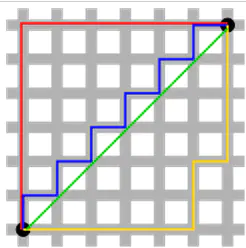

#### L2 范数

$L2$ 范数（也称为欧几里得范数）是向量元素平方和的平方根。对于向量 $\mathbf{A} = [A_1, A_2, \ldots, A_n]$，$L2$ 范数定义为：

$$
\|\mathbf{A}\|_2 = \sqrt{A_1^2 + A_2^2 + \cdots + A_n^2}
$$

#### L infty 范数

$L\infty$ 范数（也称为最大范数或切比雪夫范数）是向量元素绝对值的最大值。对于向量 $\mathbf{A} = [A_1, A_2, \ldots, A_n]$，$L\infty$ 范数定义为：

$$
\|\mathbf{A}\|_\infty = \max(|A_1|, |A_2|, \ldots, |A_n|)
$$

#### Lp范数

一般的 $Lp$ 范数是向量元素绝对值的 $p$ 次方和的 $p$ 次方根。对于向量 $\mathbf{A} = [A_1, A_2, \ldots, A_n]$，$Lp$ 范数定义为：

$$
\|\mathbf{A}\|_p = \left( |A_1|^p + |A_2|^p + \cdots + |A_n|^p \right)^{\frac{1}{p}}
$$

当 $p = 1$ 时，就是 $L1$ 范数；当 $p = 2$ 时，就是 $L2$ 范数；当 $p \to \infty$ 时，就是 $L\infty$ 范数。

#### 示例

假设有一个三维向量 $\mathbf{A} = [1, -2, 3]$：

- $L1$ 范数为：

  $$
  \|\mathbf{A}\|_1 = |1| + |-2| + |3| = 1 + 2 + 3 = 6
  $$

- $L2$ 范数为：

  $$
  \|\mathbf{A}\|_2 = \sqrt{1^2 + (-2)^2 + 3^2} = \sqrt{1 + 4 + 9} = \sqrt{14}
  $$

- $L\infty$ 范数为：

  $$
  \|\mathbf{A}\|_\infty = \max(|1|, |-2|, |3|) = 3
  $$

#### python 实现范数

可以使用 Numpy 的 `linalg.norm()` 函数计算范数

In [2]:
import numpy as np

a = np.array([1,1,-1,-1])

print("--- L2范数 ---")
print(np.linalg.norm(a)) # 默认为L2范数

print("--- L1范数 ---")
print(np.linalg.norm(a,1)) # L1范数

print("--- 切比雪夫范数 ---")
print(np.linalg.norm(a,np.inf)) # 切比雪夫范数

--- L2范数 ---
2.0
--- L1范数 ---
4.0
--- 切比雪夫范数 ---
1.0


#### !范数的应用
范数在人工智能中被用于正则化。所谓正则化，就是通过调节参数来预防人工智能网络的学习超出必要程度（即过拟合 over-fit）

### 为什么范数可以帮助预防过拟合

向量范数在预防过拟合中起到关键作用，主要通过正则化技术来实现。正则化是一种在模型训练过程中加入额外约束或惩罚的技术，以避免模型过于复杂，从而提升其泛化能力。以下是详细解释：

#### 1. 减少模型复杂度

过拟合通常发生在模型过于复杂，能够很好地拟合训练数据，但在未见过的数据上表现较差。通过在损失函数中加入范数项，可以限制模型参数的大小，使模型不至于变得过于复杂。

#### 2. L1 正则化和 L2 正则化

**L1 正则化**

L1 正则化（Lasso 回归）在损失函数中加入参数的 L1 范数，即参数绝对值之和：

$$
\text{Loss}_{\text{L1}} = \text{Loss} + \lambda \sum_{i} |w_i|
$$

其中，$\lambda$ 是正则化参数，$w_i$ 是模型参数。

L1 正则化的效果是将某些参数推向零，从而实现参数稀疏性。这不仅降低了模型复杂度，还可以进行特征选择。

**L2 正则化**

L2 正则化（Ridge 回归）在损失函数中加入参数的 L2 范数，即参数平方和：

$$
\text{Loss}_{\text{L2}} = \text{Loss} + \lambda \sum_{i} w_i^2
$$

L2 正则化通过惩罚参数的平方和，限制了参数的大小，使得模型更加平滑，从而避免对训练数据的过拟合。

#### 3. 减少参数对噪声的敏感性

通过正则化，参数的绝对值被限制在较小的范围内，这使得模型对训练数据中的噪声不那么敏感。较小的参数意味着模型不会过于依赖某些特定的特征，这样可以提升模型在新数据上的表现。

#### 4. 增强泛化能力

正则化通过在损失函数中加入范数项，实质上是对模型的复杂度进行了约束，使得模型更关注于主要的、全局的特征，而不是对训练数据进行过拟合。这样，模型在处理未见过的数据时，更能够泛化，从而提高预测精度。

#### 示例

假设我们在训练一个线性回归模型，使用 L2 正则化可以帮助我们防止过拟合：

$$
\text{Loss} = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 + \frac{\lambda}{2} \sum_{j=1}^n w_j^2
$$

其中，$m$ 是训练样本的数量，$\hat{y}^{(i)}$ 是模型的预测值，$y^{(i)}$ 是实际值，$w_j$ 是模型的参数，$\lambda$ 是正则化参数。

通过引入 $\frac{\lambda}{2} \sum_{j=1}^n w_j^2$ 项，参数 $w_j$ 被限制在较小的范围内，从而避免模型过拟合训练数据。

综上所述，向量范数通过正则化技术，可以有效减少模型复杂度，增强模型的泛化能力，从而帮助预防过拟合。


## 3）矩阵的积

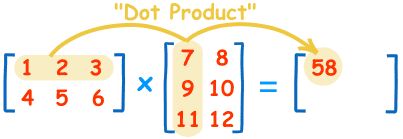

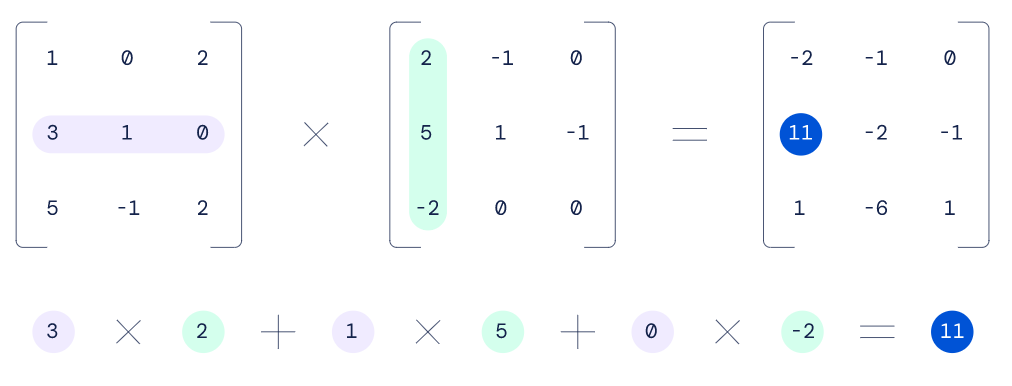

计算矩阵乘积时，要将前一矩阵中行的各元素与后一矩阵中列的各元素相乘，求和并作为新矩阵的元素。图1中进行的是左侧矩阵第1行和右侧矩阵第1列的运算，而图2进行的是左侧矩阵第2行和右侧矩阵第1列的运算。如此，就可以对左侧矩阵中的所有行和右侧矩阵中的所有列进行运算，从而创建一个新的矩阵。

$$
\mathbf{A} = 
\begin{bmatrix}
A_{11} & A_{12} & \cdots & A_{1n} \\
A_{21} & A_{22} & \cdots & A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{m1} & A_{m2} & \cdots & A_{mn}
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
B_{11} & B_{12} & \cdots & B_{1p} \\
B_{21} & B_{22} & \cdots & B_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
B_{n1} & B_{n2} & \cdots & B_{np}
\end{bmatrix}
$$

$$
\mathbf{A*B} = 
\begin{bmatrix}
C_{11} & C_{12} & \cdots & C_{1p} \\
C_{21} & C_{22} & \cdots & C_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
C_{m1} & C_{m2} & \cdots & C_{mp}
\end{bmatrix}
$$

其中，$C_{ij}$ 表示 $\mathbf{C}$ 的第 $i$ 行第 $j$ 列的元素，计算公式为：

$$
C_{ij} = \sum_{k=1}^n A_{ik} B_{kj}
$$

上述的矩阵乘积计算中出现了求和符号 $\Sigma$ ，这是因为矩阵乘积常常活跃于积的求和计算中。人工智能学习中会频繁地计算积的总和，因此矩阵乘积的学习必不可少。


### a-矩阵的实现

使用Numpy 计算矩阵乘积

In [1]:
import numpy as np

a = np.array([[0,1,2],
              [1,2,3]])

b = np.array([[2,1],
              [2,1],
              [2,1]])

print(np.dot(a,b))

[[ 6  3]
 [12  6]]


### b-哈达玛积（Hadamard Product）

哈达玛积（Hadamard Product），又称为元素积（element-wise product）或Schur积，是矩阵运算中的一种特殊类型的乘法。与常规的矩阵乘法不同，哈达玛积是对应元素相乘。

#### 定义

给定两个相同维度的矩阵 $\mathbf{A}$ 和 $\mathbf{B}$：

$$
\mathbf{A} = 
\begin{bmatrix}
A_{11} & A_{12} & \cdots & A_{1n} \\
A_{21} & A_{22} & \cdots & A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{m1} & A_{m2} & \cdots & A_{mn}
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
B_{11} & B_{12} & \cdots & B_{1n} \\
B_{21} & B_{22} & \cdots & B_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
B_{m1} & B_{m2} & \cdots & B_{mn}
\end{bmatrix}
$$

它们的哈达玛积 $\mathbf{C} = \mathbf{A} \circ \mathbf{B}$ 定义为：

$$
\mathbf{C} = 
\begin{bmatrix}
A_{11} B_{11} & A_{12} B_{12} & \cdots & A_{1n} B_{1n} \\
A_{21} B_{21} & A_{22} B_{22} & \cdots & A_{2n} B_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{m1} B_{m1} & A_{m2} B_{m2} & \cdots & A_{mn} B_{mn}
\end{bmatrix}
$$

换句话说，矩阵 $\mathbf{C}$ 中的每个元素 $C_{ij}$ 是矩阵 $\mathbf{A}$ 中的对应元素 $A_{ij}$ 和矩阵 $\mathbf{B}$ 中的对应元素 $B_{ij}$ 的乘积：

$$
C_{ij} = A_{ij} \cdot B_{ij}
$$

#### 示例

假设我们有两个矩阵：

$$
\mathbf{A} = 
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

它们的哈达玛积 $\mathbf{C} = \mathbf{A} \circ \mathbf{B}$ 为：

$$
\mathbf{C} = 
\begin{bmatrix}
1 \cdot 7 & 2 \cdot 8 & 3 \cdot 9 \\
4 \cdot 10 & 5 \cdot 11 & 6 \cdot 12
\end{bmatrix}
= 
\begin{bmatrix}
7 & 16 & 27 \\
40 & 55 & 72
\end{bmatrix}
$$

#### 应用

哈达玛积在许多领域有广泛的应用，包括：

1. **神经网络**：在反向传播算法中，元素乘法用于计算梯度。
2. **图像处理**：对图像进行滤波和变换时，常用哈达玛积进行逐像素操作。
3. **统计学和信号处理**：用于协方差矩阵的逐元素运算和滤波器的应用。

#### 注意事项

- 哈达玛积要求两个矩阵具有相同的维度。
- 与常规矩阵乘法不同，哈达玛积不涉及矩阵的行和列的内积运算，而是逐元素乘法。

哈达玛积是线性代数中的一种基本运算，在机器学习和数据处理等多个领域具有重要的应用价值。

#### 使用numpy计算哈达玛积

计算各元素乘积时，数组的形状必须相同。需要使用 $+$ 表示每个元素的和，使用 $-$ 表示每个元素的差，使用 $/$ 表示每个元素间的除法运算

In [3]:
# 实现哈达玛积
import numpy as np


t = np.arange(9)

a = t.reshape((3,3))

b = np.array([[0,1,2],
              [2,0,1],
              [1,2,0]])

print(a*b)
print(a+b)
print(a/b)

[[ 0  1  4]
 [ 6  0  5]
 [ 6 14  0]]
[[0 2 4]
 [5 4 6]
 [7 9 8]]
[[nan 1.  1. ]
 [1.5 inf 5. ]
 [6.  3.5 inf]]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5928\577706164.py:15: RuntimeWarning: divide by zero encountered in divide
  print(a/b)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5928\577706164.py:15: RuntimeWarning: invalid value encountered in divide
  print(a/b)


## 4）矩阵转置

在对矩阵的重要操作中，有一种操作是转置。通过转置矩阵，可以交换矩阵的行和列。我们把经过转置的矩阵记作 $A^T$

下面用numpy实现矩阵转置操作

In [5]:
import numpy as np

a = np.array([[1,2,3],
              [4,5,6]])

print(a.reshape((3,2)))
print(a.T)

[[1 2]
 [3 4]
 [5 6]]
[[1 4]
 [2 5]
 [3 6]]


通过矩阵转置，我们可将原本不能进行点积的矩阵进行转化，从而满足条件进行点积，例如下面的A，B矩阵无法直接相乘，但将B矩阵进行转置，就满足的行列相等，可以进行运算

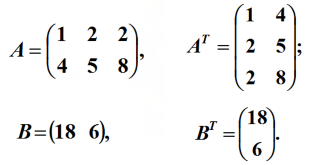



In [13]:
A = np.array([[1,2,2],
              [4,5,8]])

B = np.array([[18,6]])
print(np.dot(A.T,B.T))

[[42]
 [66]
 [84]]


# 自主拓展

### 1-向量叉积
向量积（也称为叉积）定义为
$$\textbf{e} = \textbf{a} \times \textbf{b} = \lvert a \rvert\ \lvert b \rvert\ \sin(\theta)\hat{n}$$
---
$$
\left( \begin{array}{c}
e_x \\
e_y \\
e_z \end{array} \right) =
\left(
\begin{array}{c}
a_x \\
a_y \\
a_z
\end{array} \right)
\times
\left(
\begin{array}{c}
b_x \\
b_y \\
b_z
\end{array}
\right)
=
\left(
\begin{array}{c}
a_yb_z - a_zb_y \\
a_zb_x - a_xb_z\\
a_xb_y - a_yb_x

\end{array}
\right)$$
从几何角度来说，叉积的长度等于 $a$ 和 $b$ 的大小乘以它们之间的角度的正弦值。它指向 $\hat{n}$ 的方向，这是直接指向 $a$ 和 $b$ 所在平面的向量。这意味着如果两个向量指向方向相同（或完全相反），那么它们的叉积将为零。试试上面的方法吧！

### 2-向量的点积扩展为矩阵积

在线性代数中，向量的点积可以扩展为矩阵乘积。这一概念在机器学习和数据科学中尤为重要，因为矩阵乘法是许多算法的核心操作。

#### 向量的点积

首先，回顾一下向量的点积。给定两个向量 $\mathbf{A}$ 和 $\mathbf{B}$：

$$
\mathbf{A} = [A_1, A_2, \ldots, A_n]
$$

$$
\mathbf{B} = [B_1, B_2, \ldots, B_n]
$$

它们的点积定义为：

$$
\mathbf{A} \cdot \mathbf{B} = A_1 B_1 + A_2 B_2 + \cdots + A_n B_n
$$

#### 矩阵的乘法

现在，我们扩展到矩阵乘法。假设有两个矩阵 $\mathbf{A}$ 和 $\mathbf{B}$：

$$
\mathbf{A} = 
\begin{bmatrix}
A_{11} & A_{12} & \cdots & A_{1n} \\
A_{21} & A_{22} & \cdots & A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{m1} & A_{m2} & \cdots & A_{mn}
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
B_{11} & B_{12} & \cdots & B_{1p} \\
B_{21} & B_{22} & \cdots & B_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
B_{n1} & B_{n2} & \cdots & B_{np}
\end{bmatrix}
$$

矩阵乘积 $\mathbf{C} = \mathbf{A} \mathbf{B}$ 定义为：

$$
\mathbf{C} = 
\begin{bmatrix}
C_{11} & C_{12} & \cdots & C_{1p} \\
C_{21} & C_{22} & \cdots & C_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
C_{m1} & C_{m2} & \cdots & C_{mp}
\end{bmatrix}
$$

其中，$C_{ij}$ 表示 $\mathbf{C}$ 的第 $i$ 行第 $j$ 列的元素，计算公式为：

$$
C_{ij} = \sum_{k=1}^n A_{ik} B_{kj}
$$

#### 矩阵乘法的几何解释

矩阵乘法的几何解释是：矩阵 $\mathbf{A}$ 的行向量与矩阵 $\mathbf{B}$ 的列向量进行点积。对于每个 $i$ 和 $j$，$\mathbf{A}$ 的第 $i$ 行和 $\mathbf{B}$ 的第 $j$ 列的点积给出了矩阵 $\mathbf{C}$ 中的元素 $C_{ij}$。

#### 示例

假设我们有两个矩阵：

$$
\mathbf{A} = 
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix}
$$

矩阵乘积 $\mathbf{C} = \mathbf{A} \mathbf{B}$ 为：

$$
\mathbf{C} = 
\begin{bmatrix}
1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 & 1 \cdot 8 + 2 \cdot 10 + 3 \cdot 12 \\
4 \cdot 7 + 5 \cdot 9 + 6 \cdot 11 & 4 \cdot 8 + 5 \cdot 10 + 6 \cdot 12
\end{bmatrix}
= 
\begin{bmatrix}
58 & 64 \\
139 & 154
\end{bmatrix}
$$

通过以上步骤，我们将向量的点积扩展到矩阵乘法，能够处理更复杂的线性代数运算，这在数据处理和机器学习中非常重要。


## 3-前列后行的原理

为什么矩阵点积必须前列等于后行数

矩阵乘法（点积）要求前列等于后行数，其背后的原因源于矩阵乘法的定义和计算规则。下面是详细的解释。
#### 矩阵乘法的定义

假设我们有两个矩阵 $\mathbf{A}$ 和 $\mathbf{B}$：

- 矩阵 $\mathbf{A}$ 的维度是 $m \times n$（即 $\mathbf{A}$ 有 $m$ 行 $n$ 列）
- 矩阵 $\mathbf{B}$ 的维度是 $n \times p$（即 $\mathbf{B}$ 有 $n$ 行 $p$ 列）

矩阵 $\mathbf{A}$ 和 $\mathbf{B}$ 的乘积 $\mathbf{C} = \mathbf{A} \cdot \mathbf{B}$ 将是一个 $m \times p$ 的矩阵。其计算规则如下：

$$
C_{ij} = \sum_{k=1}^{n} A_{ik} B_{kj}
$$

其中，$C_{ij}$ 是矩阵 $\mathbf{C}$ 中第 $i$ 行第 $j$ 列的元素。

#### 计算矩阵乘法的过程

矩阵乘法的计算过程是将矩阵 $\mathbf{A}$ 的行向量与矩阵 $\mathbf{B}$ 的列向量进行内积计算。具体过程如下：

1. 取矩阵 $\mathbf{A}$ 的第 $i$ 行：
   $$
   \mathbf{A}_i = [A_{i1}, A_{i2}, \ldots, A_{in}]
   $$
2. 取矩阵 $\mathbf{B}$ 的第 $j$ 列：
   $$
   \mathbf{B}_j = [B_{1j}, B_{2j}, \ldots, B_{nj}]
   $$
3. 计算 $\mathbf{A}_i$ 和 $\mathbf{B}_j$ 的内积，得到矩阵 $\mathbf{C}$ 的第 $i$ 行第 $j$ 列的元素 $C_{ij}$：
   $$
   C_{ij} = \mathbf{A}_i \cdot \mathbf{B}_j = A_{i1} B_{1j} + A_{i2} B_{2j} + \cdots + A_{in} B_{nj}
   $$

<u>从这个计算过程可以看出，**为了能够进行内积计算，$\mathbf{A}$ 的列数（即行向量的长度）必须等于 $\mathbf{B}$ 的行数（即列向量的长度）**。因此，矩阵乘法必须满足前列等于后行数这一条件。</u>

#### 反例解释

如果我们尝试使用前行等于后列数来进行矩阵乘法，将会导致无法进行有效的内积计算。考虑以下情况：

- 矩阵 $\mathbf{A}$ 是 $n \times m$
- 矩阵 $\mathbf{B}$ 是 $p \times n$

在这种情况下，矩阵 $\mathbf{A}$ 的行向量长度为 $m$，而矩阵 $\mathbf{B}$ 的列向量长度为 $p$。显然，无法对这两个向量进行内积计算，因为它们的长度不同。

#### 示例

假设有以下两个矩阵：

$$
\mathbf{A} = 
\begin{bmatrix}
1 & 2 & 2 \\
4 & 5 & 8
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
18 \\
6 \\
3
\end{bmatrix}
$$

矩阵 $\mathbf{A}$ 是 $2 \times 3$ 的矩阵，矩阵 $\mathbf{B}$ 是 $3 \times 1$ 的矩阵，它们的乘积是：

$$
\mathbf{C} = \mathbf{A} \cdot \mathbf{B} = 
\begin{bmatrix}
1 \cdot 18 + 2 \cdot 6 + 2 \cdot 3 \\
4 \cdot 18 + 5 \cdot 6 + 8 \cdot 3
\end{bmatrix}
= 
\begin{bmatrix}
18 + 12 + 6 \\
72 + 30 + 24
\end{bmatrix}
= 
\begin{bmatrix}
36 \\
126
\end{bmatrix}
$$

#### 使用 NumPy 进行计算

下面是使用 `numpy` 实现上述矩阵乘法的代码：

```python
import numpy as np

# 定义矩阵 A 和 B
A = np.array([[1, 2, 2],
              [4, 5, 8]])

B = np.array([[18],
              [6],
              [3]])

# 计算矩阵乘积 C = A * B
C = np.dot(A, B)

print("矩阵 A:")
print(A)

print("\n矩阵 B:")
print(B)

print("\n矩阵 C = A * B:")
print(C)


# 学习工具

### 数学可视化
https://academo.org/demos/3d-vector-plotter/